![Astrofisica Computacional](../../../logo.png)

---
## 04. Linear Regression Algorithm with a Numerical Gradient


Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### About this notebook

In this worksheet, we implement an algorithm of linear regression using an optimization procedure based on a numerical gradient.

---

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

### Edwin Hubble's data

Around the 1920-30's, Edwin Hubble show that the "nebulae" were external galaxies and not part of our own Galaxy, the Milky Way. In a seminal paper, 

https://ui.adsabs.harvard.edu/abs/1931ApJ....74...43H

E. Hubble and M. Humason determined that some of these galaxies moved away from Earth with a velocity $v$ that is proportional to their distance $d$, i.e.

$v=H_0 d.$

This relation is now known as *Hubble's law* and quantity $H_0$ is called the *Hubble constant*. It is usual to give the value of $H_0$ in units of $\textrm{km}\, \textrm{s}^{-1} \, \textrm{Mpc}^{-1}$. 
The original data of Hubble and Humason is summarized in the data file `hubble.csv`.



In [17]:
df = pd.read_csv("data/hubble.csv")

df

,Name,N_measurements,velocity,mean_m
0,Virgo,7,890,12.5
1,Pegasus,5,3810,15.5
2,Pisces,4,4630,15.4
3,Cancer,2,4820,16.0
4,Perseus,4,5230,16.4
5,Coma,3,7500,17.0
6,Ursa_Major,1,11800,18.0
7,Leo,1,19600,19.0
8,[No_Name],16,2350,13.8
9,[No_Name],16,630,11.6


The data in the data frame includes 10 samples (Nebulae) with 4 features:

**Name** : Name of the nebula \
**N_measurement** : Number of velocities measured by Hubble and Humason \
**velocity** : Mean velocity of the nebula measured in km/s \
**mean_m** : Apparent magnitude of the nebula

___



In [18]:
df['log10_velocity'] = np.log10(df['velocity'])
df

,Name,N_measurements,velocity,mean_m,log10_velocity
0,Virgo,7,890,12.5,2.949390
1,Pegasus,5,3810,15.5,3.580925
2,Pisces,4,4630,15.4,3.665581
3,Cancer,2,4820,16.0,3.683047
4,Perseus,4,5230,16.4,3.718502
5,Coma,3,7500,17.0,3.875061
6,Ursa_Major,1,11800,18.0,4.071882
7,Leo,1,19600,19.0,4.292256
8,[No_Name],16,2350,13.8,3.371068
9,[No_Name],16,630,11.6,2.799341


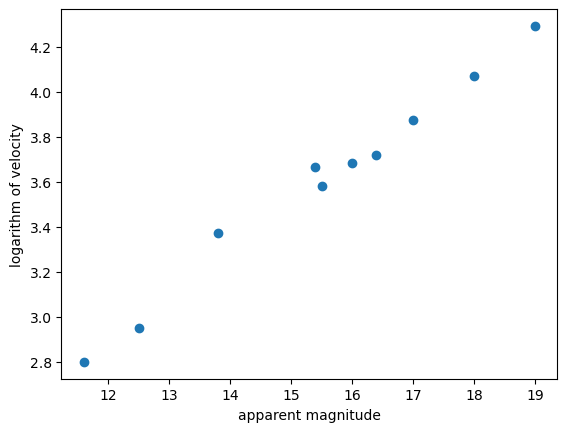

In [19]:
plt.scatter(df['mean_m'], df['log10_velocity'])
plt.xlabel(r'apparent magnitude')
plt.ylabel(r'logarithm of velocity')
plt.show()

### Linear Regression

Since the plot of the logarithm of the velocity vs. apparent magnitude has a linear tendence, we will create a linear regression for this data.

The goal of the following algorithm is to minimize the *cost function*

\begin{equation}
f_c(\{a_j\}) = \sum_{i=1}^N \left( Y(x_i,\{a_j\}) - y_i \right)^2\,\,
\end{equation}

where

\begin{equation}
Y(x, \{w,b\}) =  w x + b\,\,.
\end{equation}

### Gradient Descent

The minimization will be done by using the numerical gradient of the cost function with respect to the parameters $w$ and $b$.

We also introduce a learning rate to reach the minimum of the cost function.

<img src="GradientDescent.png" />





In [20]:
X_train = np.asarray(df['mean_m'])
y_train = np.asarray(df['log10_velocity'])

In [25]:
class LinearRegression():
    '''
    Linear regression class
    '''
    def __init__(self):
        # Initial random parameters
        np.random.seed(413)
        self.W = np.random.rand() 
        self.b = np.random.rand()

    def predict(self, X):
        '''
        Function to fit
        '''
        return self.W*X + self.b
    
    def cost(self, X, y):
        '''
        Cost function
        '''
        delta = self.predict(X) - y
        return np.sum(delta**2)
    
    def grad_cost(self, X, y):
        '''
        Numerical Gradient of the cost function
        '''
        grad_dW, grad_db = self.numGrad(X, y)
        return grad_dW, grad_db
    
    def fit(self, X, y):
        '''
        Optimization function
        '''
        alpha= 0.0001 # Learning rate
        tol = 1e-13 # Tolerance

        self.history = []
        self.history.append(self.cost(X, y))
        print('Initial cost = ', self.history[0])
        
        epoch = 0 # Epochs
        epsilon = 1
        while epsilon>tol and epoch<250000:
            # Gradients
            grad_dW, grad_db = self.grad_cost(X,y)
            self.W = self.W - alpha*grad_dW
            self.b = self.b - alpha*grad_db
            
            self.history.append(self.cost(X, y))
            epsilon = abs(self.history[epoch] - self.history[epoch+1])
            epoch +=1
        
        print('Final cost = ', self.history[-1])
        print('Number of epochs = ',epoch)
        return self.W, self.b
    
    def score(self, X, y):
        '''
        R^2 coefficient
        '''
        n = len(y)
        mean_y = (1/n)*np.sum(y)
        numer = np.sum((self.predict(X) - y)**2)
        denom = np.sum((y-mean_y)**2)
        return 1 - numer/denom
    
    def numGrad(self, X, y):
        '''
        Numerical gradient using central finite
        differences.
        '''
        Wrem = self.W
        brem = self.b
        dW, db = 1e-8, 1e-8
        self.W = Wrem - dW
        fcW1 = self.cost(X,y) 
        self.W = Wrem + dW
        fcW2 = self.cost(X,y)
        self.W = Wrem
        self.b = brem - dW
        fcb1 = self.cost(X,y)
        self.b = brem + dW
        fcb2 = self.cost(X,y)
        self.b = brem
        grad_dW = (fcW2 - fcW1)/(2*dW)
        grad_db = (fcb2 - fcb1)/(2*db)
        return grad_dW, grad_db
      

In [26]:
lr = LinearRegression()

W, b = lr.fit(X_train, y_train)

print('\nThe optimized parameters are')
print('W = ',W)
print('b = ',b)

Initial cost =  497.25733688859845
Final cost =  0.027902854198589535
Number of epochs =  196370

The optimized parameters are
W =  0.19667392089527627
b =  0.5483244145832271


In [27]:
lr.score(X_train,y_train)

0.9854665658992894

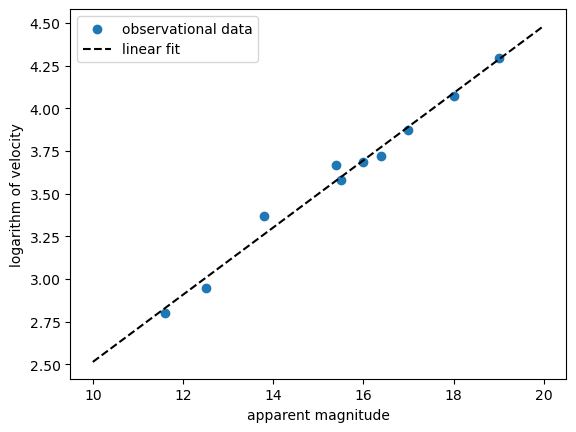

In [28]:
# Plot
x_range= np.linspace(10,20,40)

plt.figure()
plt.scatter(X_train, y_train,label='observational data')
plt.plot(x_range, lr.predict(x_range), '--k', label='linear fit')

plt.xlabel(r'apparent magnitude')
plt.ylabel(r'logarithm of velocity')
plt.legend()
plt.show()

The obtained linear model gives the relation between velocity and apparent magnitude as

$\log_{10} v = a_1 + a_2 m = 0.548 + 0.197 m$.

At this point we will assume, as Hubble and Humason did, that the coefficient of $m$ in this equation will be $0.2$, and therefore the equation becomes

$\log_{10} v = a_1 + a_2 m = 0.548 + 0.2 m$.

From the expression for the distance, we have 

$\log_{10} d = \frac{m-M+5}{5} \,  \rightarrow \, \log_{10} d = 0.2m - 0.2M + 1$

and therefore we can write

$\log_{10} \left( \frac{v}{d} \right) = \log_{10}v - \log_{10} d = a_1  - 1+ 0.2M $.

Using  the obtained value for $a_1$ and $M=-13.8$ we get

$\log_{10} \left( \frac{v}{d} \right) = -3.212$,

which gives the Hubble constant

$H_0 = \frac{v}{d} = 10^{-3.212} = 614 \times 10^{-6} \textrm{ km } \textrm{s}^{-1} \textrm{ pc}^{-1} = 614 \textrm{ km } \textrm{s}^{-1} \textrm{ Mpc}^{-1}$ 

---

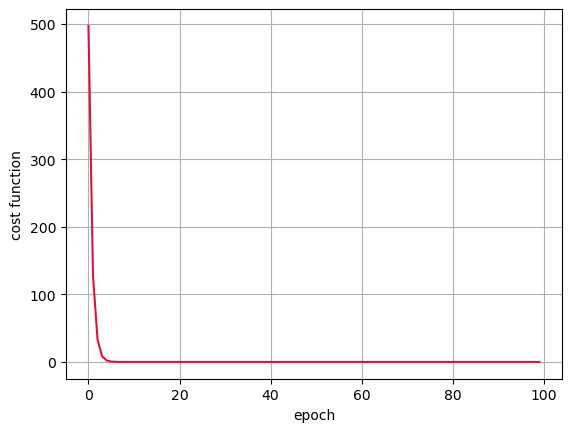

In [29]:
# Plot Training history

plt.figure()
plt.plot(lr.history[0:100], color='crimson')
plt.ylabel(r'cost function')
plt.xlabel(r'epoch')
plt.grid()
plt.show()